β: 1.8339367445933639
1.8339367445933639


/tmp/ipykernel_5952/2633595421.py:36: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(M_0,np.sqrt(-C(M_0)/κ1),c="white")
/tmp/ipykernel_5952/2633595421.py:38: RuntimeWarning: invalid value encountered in sqrt
  K = np.sqrt(C(M_0))


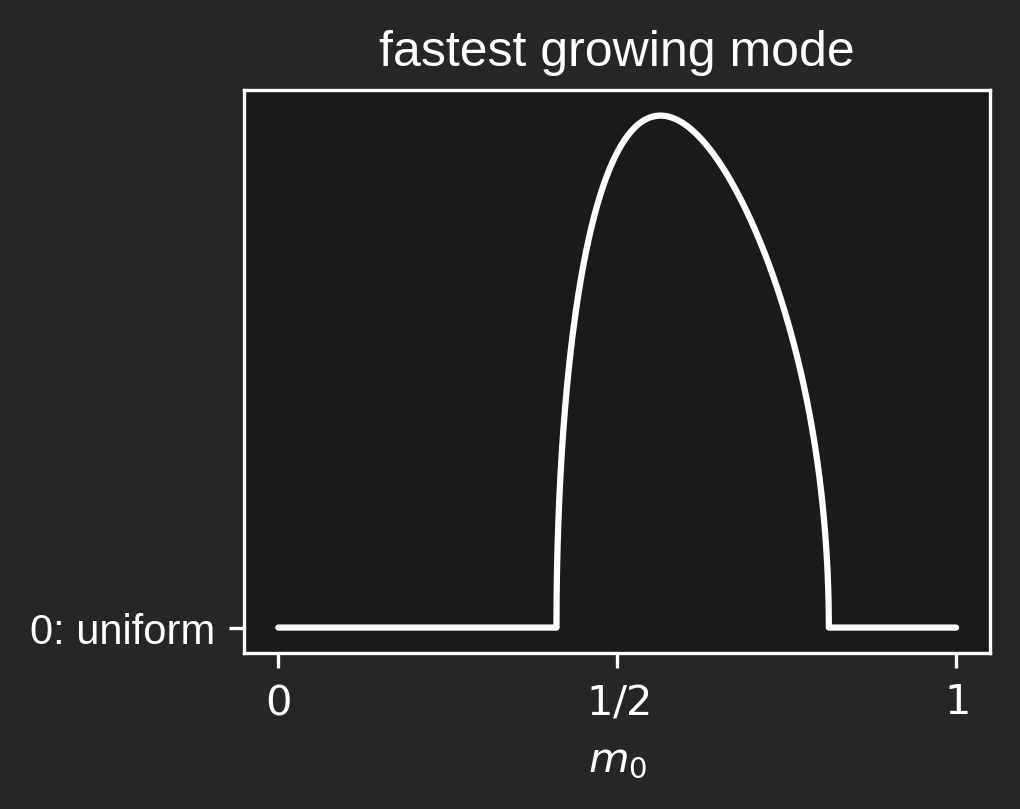

In [144]:

import numpy as np 
import matplotlib.pyplot as plt 


plt.style.use("dark_theme.mplstyle")

batlows = ['#5B8FED', '#EF8C2A', '#73B66B', '#E05858', '#B58FEF', '#FFD24D', '#63C7D6', '#BEBEBE', '#F19EC2', '#F2BE5C']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=batlows)

plt.rcParams['figure.dpi'] = 300

a=  2.3 #????? a=2.3 in paper

b = 2.19
c = 0.62
β = b/(a*c)**0.5
# β = 1.89 # dit is gek...
print("β:",β)
κ1 = 1
def C(M):
    m_0 = M*(a/c)**0.5
    m_0 = M
    return (2*β**2*m_0**2 - 5*β*m_0**3 - 3*β*m_0 + 3*m_0**4 + 4*m_0**2 + 1)

def C(M):
    # m_0 = M*(a/c)**0.5
    m_0 = M
    return (m_0**2-β*m_0+1)*(3*m_0**2-2*β*m_0+1)


import numpy as np 
import matplotlib.pyplot as plt 

M_0 = np.linspace(0,1,1000000)
plt.plot(M_0,np.sqrt(-C(M_0)/κ1),c="white")
# plt.plot(M_0,-np.sqrt(C(M_0)/κ1),c="black")
K = np.sqrt(C(M_0))

M_nul = M_0[~np.isnan(K)]
th = 0.6
plt.plot(M_nul[M_nul<th],0*M_nul[M_nul<th],c="white",label="fastest growing mode")
plt.plot(M_nul[M_nul>th],0*M_nul[M_nul>th],c="white")
plt.xlabel("$m_0$")
# plt.ylabel("$K_*$ [au]")
plt.yticks([0])
plt.gca().set_yticklabels(["0: uniform"])

plt.xticks([0,0.5,1])
plt.gca().set_xticklabels(["$0$","$1/2$","$1$"])


print(β)
scale = 0.7
plt.gcf().set_size_inches(5*scale,4*scale)
plt.title("fastest growing mode")
# plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("fastest_mode.png", transparent=True)


/tmp/ipykernel_21777/182677952.py:7: RuntimeWarning: invalid value encountered in sqrt
  m_1 = 0.5*(β-(β**2-4)**0.5)
/tmp/ipykernel_21777/182677952.py:8: RuntimeWarning: invalid value encountered in sqrt
  m_2 = 0.5*(β+(β**2-4)**0.5)
/tmp/ipykernel_21777/182677952.py:9: RuntimeWarning: invalid value encountered in sqrt
  m_3 = 1/3*(β-(β**2-3)**0.5)
/tmp/ipykernel_21777/182677952.py:10: RuntimeWarning: invalid value encountered in sqrt
  m_4 = 1/3*(β+(β**2-3)**0.5)


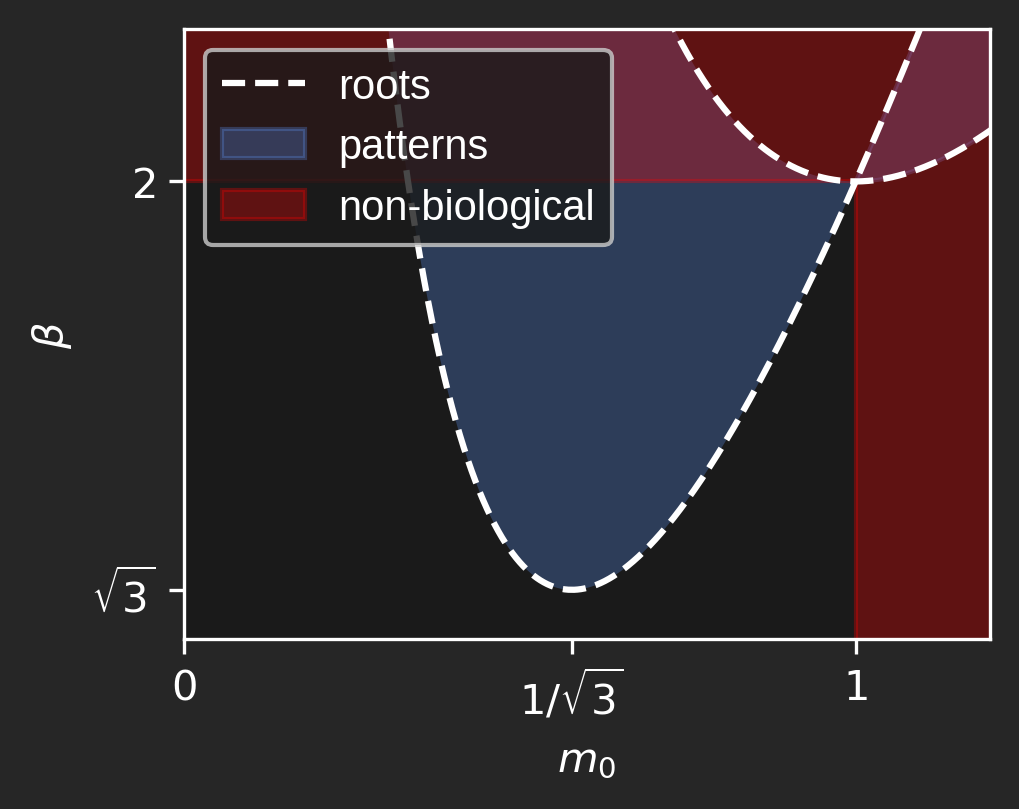

In [73]:
import numpy as np 
import matplotlib.pyplot as plt 


β = np.linspace(1.7,2.5,20000)

m_1 = 0.5*(β-(β**2-4)**0.5)
m_2 = 0.5*(β+(β**2-4)**0.5)
m_3 = 1/3*(β-(β**2-3)**0.5)
m_4 = 1/3*(β+(β**2-3)**0.5)

# plt.plot(m_1,β)

m_12 = np.concatenate((np.flip(m_2),m_1))
β = np.concatenate((np.flip(β),β))
β_12 = β[~np.isnan(m_12)]
m_12 = m_12[~np.isnan(m_12)]



m_34 = np.concatenate((np.flip(m_4),m_3))
β_34 = β[~np.isnan(m_34)]
m_34 = m_34[~np.isnan(m_34)]

closest = 0
# for 
plt.gcf().set_size_inches(5*scale,4*scale)

plt.plot(m_12,β_12,c="white",linestyle="dashed",label="roots")
plt.plot(m_34,β_34,c="white",linestyle="dashed")
plt.ylim([1.7,2.1])
plt.xlim([0,1.2])

plt.fill_between(np.concatenate((m_12[m_12<=1],np.flip(m_34[m_34<=1]),[m_12[m_12<=1][0]])),np.concatenate((β_12[m_12<=1],np.flip(β_34[m_34<=1]),[β_12[m_12<=1][0]])),alpha=0.3)

plt.fill_between(np.concatenate((m_12[m_12>=1],np.flip(m_34[m_34>=1]),[m_12[m_12>=1][0]])),np.concatenate((β_12[m_12>=1],np.flip(β_34[m_34>=1]),[β_12[m_12>=1][0]])),alpha=0.3,color="C0",label="patterns")


plt.fill_between([-1,1,1,3,3,-1],[2,2,-1,-1,3,3],color="red",alpha=0.3,label="non-biological")
# plt.fill_between([1,1,2,2],[-1,2,2,-1],color="red",alpha=0.1)
plt.legend(loc="upper left")
plt.yticks([3**0.5,2])
plt.xticks([0,3**(-0.5),1])
plt.gca().set_xticklabels(["$0$","$1/\\sqrt{3}$","$1$"])
plt.gca().set_yticklabels(["$\\sqrt{3}$","$2$"])
plt.xlabel("$m_0$")
plt.ylabel("$\\beta$")
# plt.plot([3**(-0.5),3**(-0.5)],[-1,5])
plt.tight_layout()
plt.savefig("bif_beta_m0.png",transparent=True)

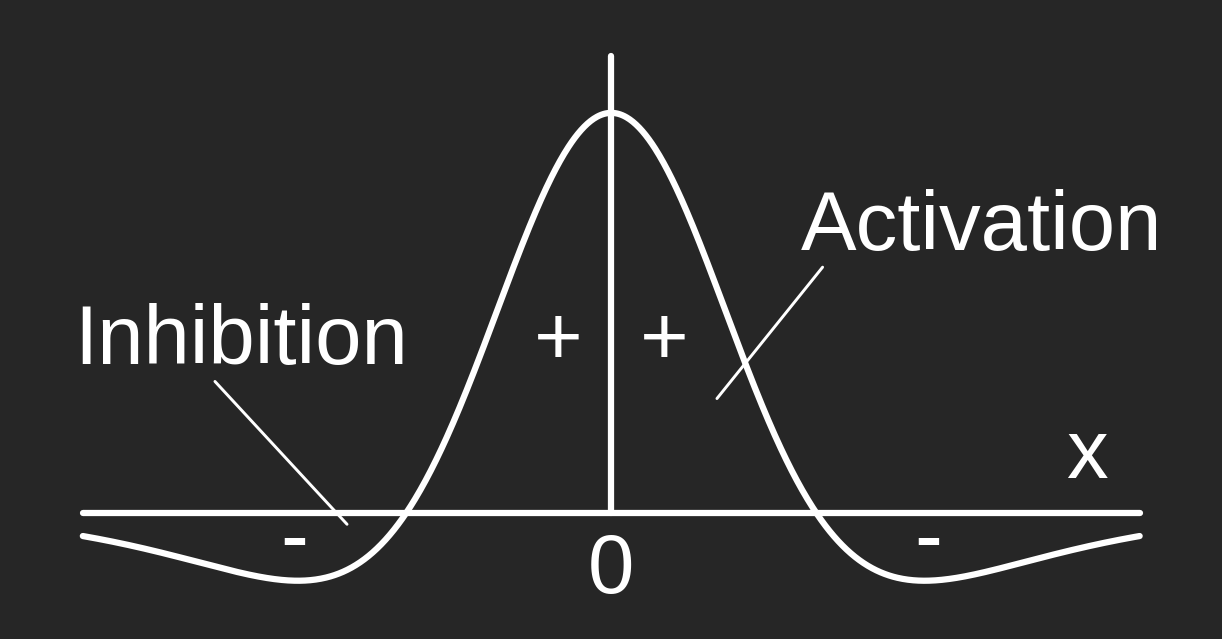

In [94]:
plt.plot([-1,1],[0,0],c="white")
plt.plot([0,0],[0,0.8],c="white")
plt.axis("off")
x = np.linspace(-1,1,1000)
plt.plot(x,-0.3*np.exp(-x**2*2)+np.exp(-x**2*10),c="white")
plt.text(0,-0.1,"0",size=20,ha="center",va="center")
plt.text(0.9,0.1,"x",size=20,ha="center",va="center")

plt.text(0.1,0.3,"+",size=20,ha="center",va="center")
plt.text(-0.1,0.3,"+",size=20,ha="center",va="center")

plt.text(0.6,-0.05,"-",size=20,ha="center",va="center")
plt.text(-0.6,-0.05,"-",size=20,ha="center",va="center")

plt.text(0.7,0.5,"Activation",size=20,ha="center",va="center")
plt.text(-0.7,0.3,"Inhibition",size=20,ha="center",va="center")

plt.plot([0.4,0.2],[0.43,0.2],c="white",linewidth=0.7)
plt.plot([-0.75,-0.5],[0.23,-0.02],c="white",linewidth=0.7)

plt.gcf().set_size_inches(5,2.5)
plt.savefig("kernel.png",transparent=True)


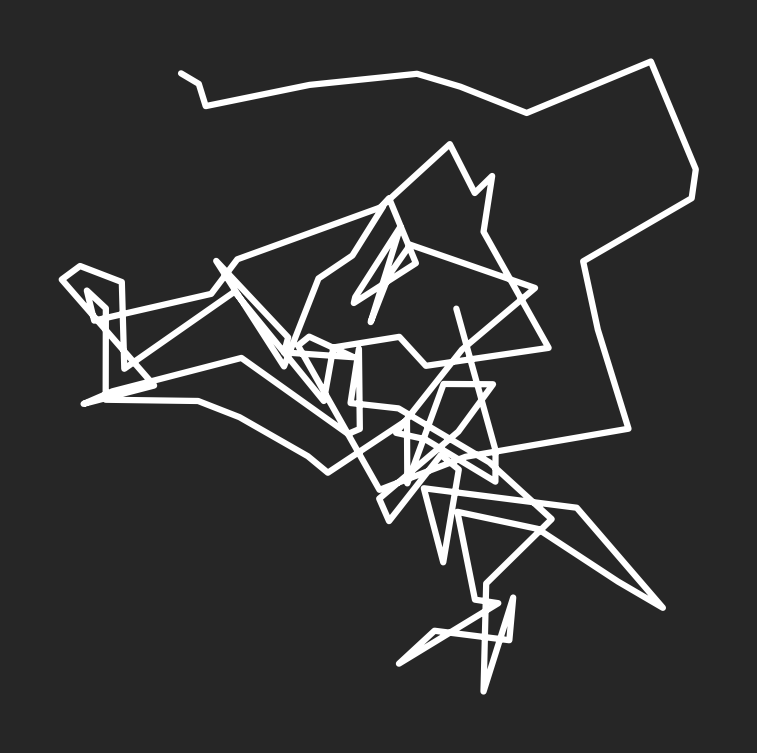

In [93]:
import numpy as np 
import matplotlib.pyplot as plt 

steps = np.random.normal(0,1,size=(2,100))
coords = np.cumsum(steps,axis=1)
plt.plot(coords[0],coords[1],c="white")

plt.gcf().set_size_inches(3,3)
plt.axis("off")
plt.savefig("randomwalk.png",transparent=True)


(-1.15, 2.15, -0.4, 1.1)

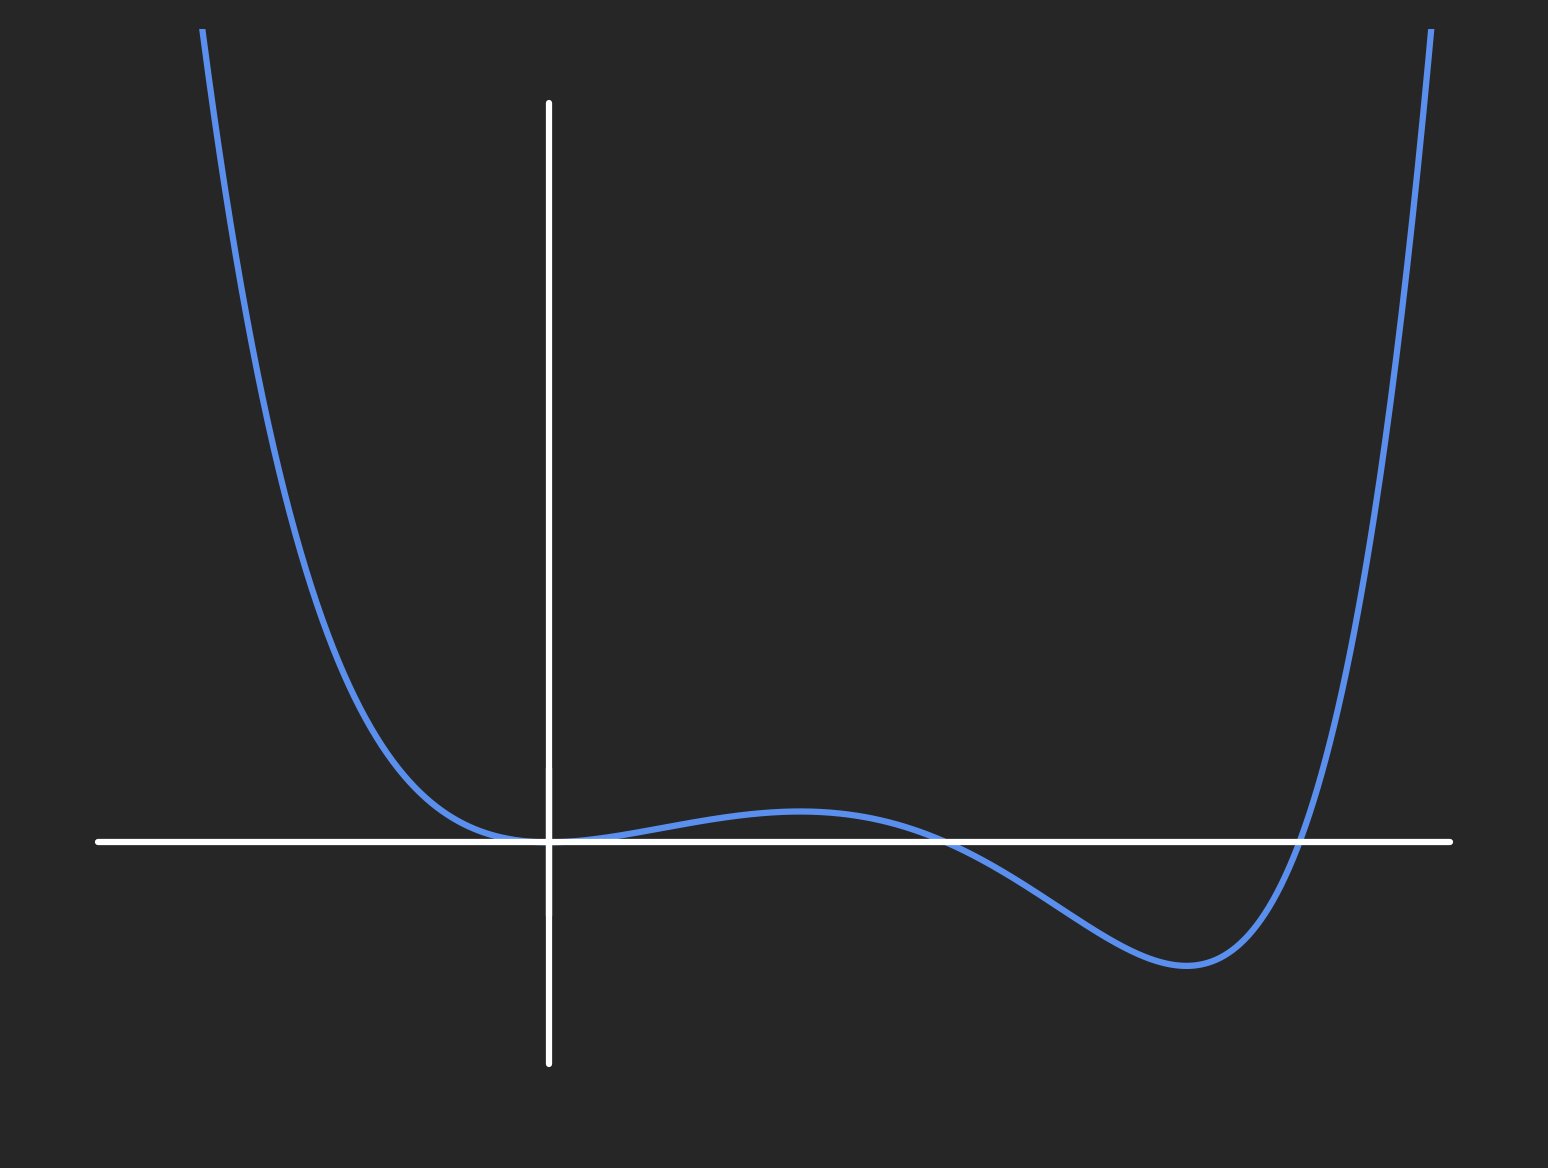

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

a=  2.3 #????? a=2.3 in paper

b = 2.19
c = 0.62
β = b/(a*c)**0.5
def C(M):
    # m_0 = M*(a/c)**0.5
    m_0 = M
    return (m_0**2-β*m_0+1)*(3*m_0**2-2*β*m_0+1)

def primitive_function(m, beta, C1):
    return (1/6) * m**6 - (beta/4) * m**5 + ((beta**2 + 2/3)/6) * m**4 - (beta/2) * m**3 + (1/2) * m**2 + C1

m = np.linspace(-1,2,1000)

plt.plot(m,primitive_function(m,β,0))

plt.plot([-1,2],[0,0],c="white")
plt.plot([0,0],[-0.3,1],c="white")
plt.ylim(-0.4,1.1)
plt.plot([0,0],[-0.1,0.1],c="white")
plt.axis("off")


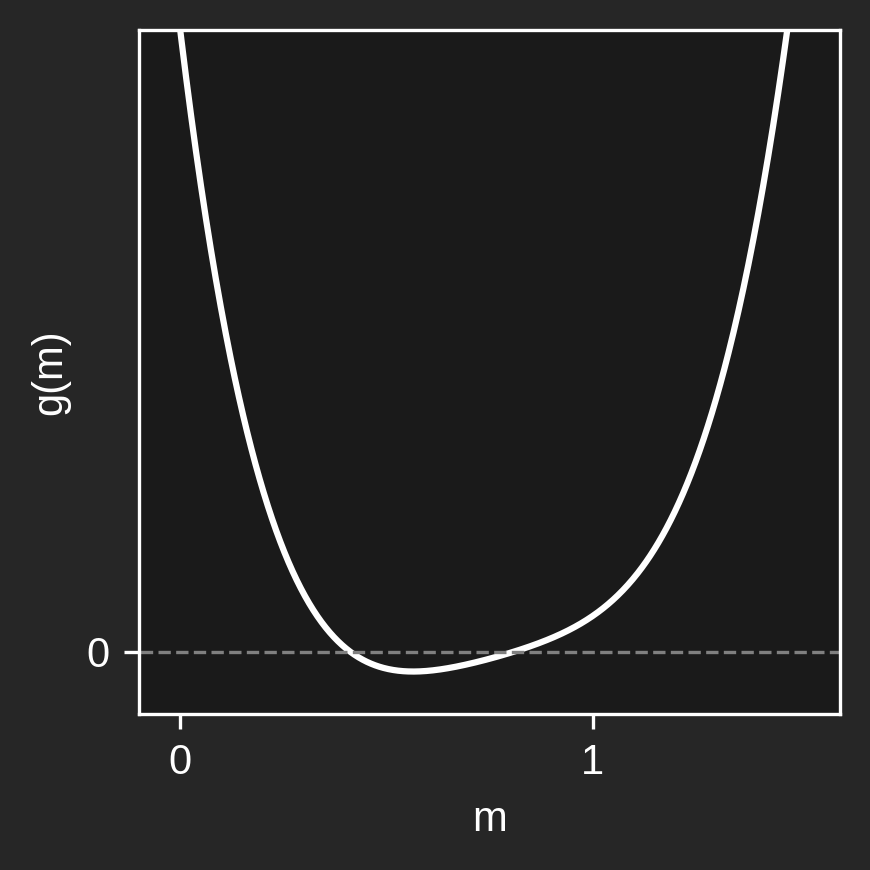

In [136]:
a=  2.3 #????? a=2.3 in paper

b = 2.19
c = 0.62
β = b/(a*c)**0.5
def g(m):
    # m = (a/c)**0.5*m
    return (m**2-beta*m+1)*(3*m**2-2*beta*m+1)

m = np.linspace(-0.3,1.7,1000)
plt.plot(m,g(m),c="white")
# plt.plot(m,0.2+0.2*(np.log(m)-5*m+2-np.log(1-m)))
plt.ylim([-0.1,1])
plt.plot([-10,10],[0,0],c="gray",linestyle="dashed",linewidth=0.8)
plt.xlim([-0.1,1.6])
plt.ylabel("g(m)")
plt.xlabel("m")
plt.gcf().set_size_inches(3,3)
plt.xticks([0,1])
plt.yticks([0])
plt.tight_layout()
plt.savefig("p.png",transparent=True)


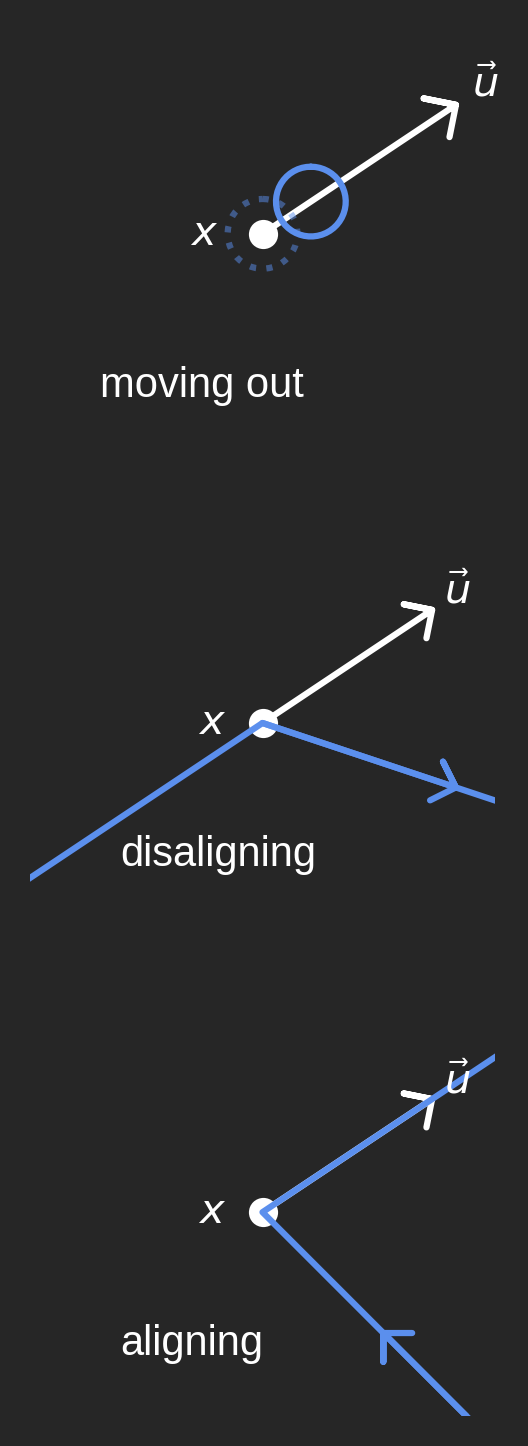

In [120]:
fig,axs = plt.subplots(3,1)
u = [0.6,0.4]
u = np.array(u)/np.linalg.norm(u)
angle = np.arctan2(u[0],u[1])
R = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
arrow = [[0,0,-0.1,0,0.1],[0,1,0.9,1,0.9]]

arrow_rot = np.dot(R,arrow)
arrow_rot = arrow_rot*np.linalg.norm(u)
for ax in axs:
    ax.text(-0.25,0,"$x$",va="center",ha="center")
    ax.text(1.15*u[0],1.15*u[1],"$\\vec u$",va="center",ha="center")
    # ax.set_title("hoi")
    ax.scatter([0],[0],c="white")
    # ax.plot([0,u[0]],[0,u[1]],c="white")
    ax.plot(arrow_rot[0],arrow_rot[1],c="white")
    ax.plot([u])
    ax.axis("equal")
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.axis("off")


phi = np.linspace(0,2*np.pi)
x=0.15*np.sin(phi)
y=0.15*np.cos(phi)
axs[0].plot(x,y,alpha=0.5,linestyle="dotted",c="C0")
axs[0].plot(x+u[0]/4,y+u[1]/4,alpha=1,c="C0")
axs[0].plot()

axs[1].plot([-3*u[0],0,3],[-3*u[1],0,-1],c="C0")
angle = np.arctan2(3,-1)
R = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
arrow = [[0,0,-0.1,0,0.1],[0,1,0.9,1,0.9]]
arrow_rot = np.dot(R,arrow)
axs[1].plot(arrow_rot[0],arrow_rot[1],c="C0")


axs[2].plot([1,0,3*u[0]],[-1,0,3*u[1]],c="C0")
angle = np.arctan2(-1,1)
R = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
arrow = [[0,0,-0.1,0,0.1],[0,1,0.9,1,0.9]]
arrow_rot = np.dot(R,arrow)
axs[2].plot(arrow_rot[0]+1.3,arrow_rot[1]-1.3,c="C0")


axs[0].text(-0.7,-0.7,"moving out")
axs[1].text(-0.7,-0.7,"disaligning")
axs[2].text(-0.7,-0.7,"aligning")

for ax in axs:
    # ax.axis("equal")
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
# fig.tight_layout()
fig.set_size_inches(2,6)
fig.savefig("change.png",transparent=True)

/tmp/ipykernel_5952/1815391254.py:14: RuntimeWarning: invalid value encountered in sqrt
  m_1 = 0.5*(β-(β**2-4)**0.5)
/tmp/ipykernel_5952/1815391254.py:15: RuntimeWarning: invalid value encountered in sqrt
  m_2 = 0.5*(β+(β**2-4)**0.5)
/tmp/ipykernel_5952/1815391254.py:16: RuntimeWarning: invalid value encountered in sqrt
  m_3 = 1/3*(β-(β**2-3)**0.5)
/tmp/ipykernel_5952/1815391254.py:17: RuntimeWarning: invalid value encountered in sqrt
  m_4 = 1/3*(β+(β**2-3)**0.5)


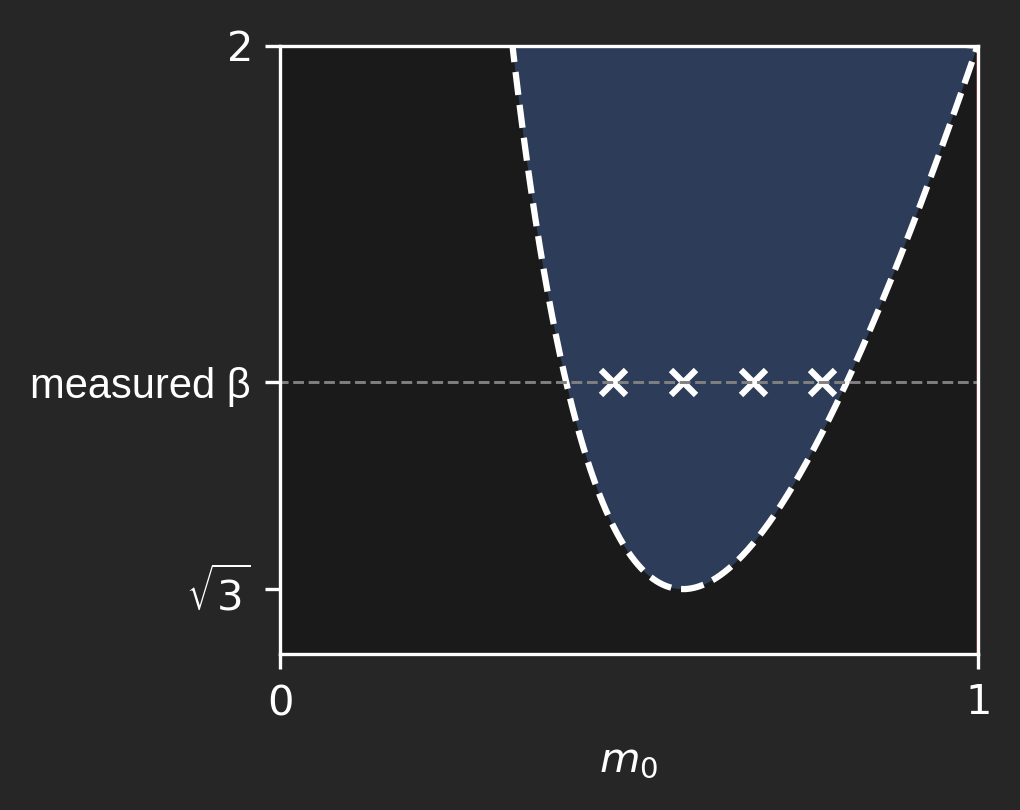

In [156]:
import numpy as np 
import matplotlib.pyplot as plt 


a=  2.3 #????? a=2.3 in paper

b = 2.19
c = 0.62
β = b/(a*c)**0.5


β = np.linspace(1.7,2.5,20000)

m_1 = 0.5*(β-(β**2-4)**0.5)
m_2 = 0.5*(β+(β**2-4)**0.5)
m_3 = 1/3*(β-(β**2-3)**0.5)
m_4 = 1/3*(β+(β**2-3)**0.5)

# plt.plot(m_1,β)

m_12 = np.concatenate((np.flip(m_2),m_1))
β = np.concatenate((np.flip(β),β))
β_12 = β[~np.isnan(m_12)]
m_12 = m_12[~np.isnan(m_12)]



m_34 = np.concatenate((np.flip(m_4),m_3))
β_34 = β[~np.isnan(m_34)]
m_34 = m_34[~np.isnan(m_34)]

closest = 0
# for 
plt.gcf().set_size_inches(5*scale,4*scale)

plt.plot(m_12,β_12,c="white",linestyle="dashed",label="roots")
plt.plot(m_34,β_34,c="white",linestyle="dashed")
plt.ylim([1.7,2])
plt.xlim([0,1])

plt.fill_between(np.concatenate((m_12[m_12<=1],np.flip(m_34[m_34<=1]),[m_12[m_12<=1][0]])),np.concatenate((β_12[m_12<=1],np.flip(β_34[m_34<=1]),[β_12[m_12<=1][0]])),alpha=0.3)

plt.fill_between(np.concatenate((m_12[m_12>=1],np.flip(m_34[m_34>=1]),[m_12[m_12>=1][0]])),np.concatenate((β_12[m_12>=1],np.flip(β_34[m_34>=1]),[β_12[m_12>=1][0]])),alpha=0.3,color="C0",label="patterns")


plt.fill_between([-1,1,1,3,3,-1],[2,2,-1,-1,3,3],color="red",alpha=0.3,label="non-biological")
# plt.fill_between([1,1,2,2],[-1,2,2,-1],color="red",alpha=0.1)
# plt.legend(loc="upper left")
plt.yticks([3**0.5,b/(a*c)**0.5,2])
plt.xticks([0,1])

plt.scatter(np.arange(-1,3)/10+3**(-0.5),np.arange(-1,3)*0+b/(a*c)**0.5,marker="x",c="white")


plt.plot([-1,1],[b/(a*c)**0.5,b/(a*c)**0.5],c="gray",linestyle="dashed",linewidth=0.7)

plt.gca().set_xticklabels(["$0$","$1$"])
plt.gca().set_yticklabels(["$\\sqrt{3}$","measured β","$2$"])
plt.xlabel("$m_0$")
# plt.ylabel("$\\beta$")
# plt.plot([3**(-0.5),3**(-0.5)],[-1,5])
plt.tight_layout()
plt.savefig("groot.png",transparent=True)